# 凝聚式层次聚类

## 凝聚式层次聚类可视化

### 导入相关模块

In [117]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

### linkage介绍

[2] 0.1 0
[8] 0.1 1
[0] -0.1 2
[4] 0.1 3
[1] 0.1 4
[9] 0.1 5
[9] -0.1 6
[0] 0.1 7


(-0.2, 0.2)

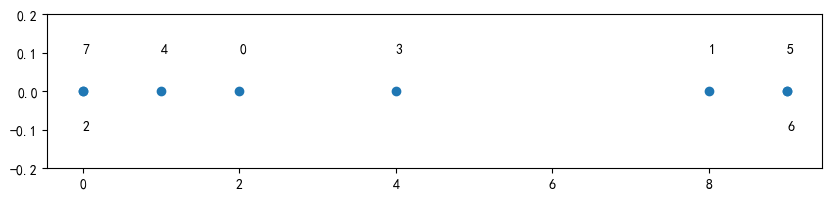

In [118]:
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
ids = [i for i in range(8)]

plt.figure(figsize=(10,2))

Y_label = [0.1]*8
Y_label[2] = -0.1
Y_label[6] = -0.1

plt.scatter(X,[0]*8)

for a,b,c in zip(X, Y_label, ids):
    print(a,b,c)
    plt.text(a[0], b, c)

plt.ylim(-0.2, 0.2)

In [119]:
Z = linkage(X, 'single')
Z

array([[ 2.,  7.,  0.,  2.],
       [ 5.,  6.,  0.,  2.],
       [ 0.,  4.,  1.,  2.],
       [ 8., 10.,  1.,  4.],
       [ 1.,  9.,  1.,  3.],
       [ 3., 11.,  2.,  5.],
       [12., 13.,  4.,  8.]])

In [120]:
Z_df = pd.DataFrame(Z, columns=["簇id", "簇id", "距离", "新簇中点数"])
Z_df

,簇id,簇id,距离,新簇中点数
0,2.0,7.0,0.0,2.0
1,5.0,6.0,0.0,2.0
2,0.0,4.0,1.0,2.0
3,8.0,10.0,1.0,4.0
4,1.0,9.0,1.0,3.0
5,3.0,11.0,2.0,5.0
6,12.0,13.0,4.0,8.0


行索引 index + n 为 新簇的id

In [121]:
pd.DataFrame(Z, columns=["簇id", "簇id", "距离", "新簇中点数"], index=Z_df.index+len(X))

,簇id,簇id,距离,新簇中点数
8,2.0,7.0,0.0,2.0
9,5.0,6.0,0.0,2.0
10,0.0,4.0,1.0,2.0
11,8.0,10.0,1.0,4.0
12,1.0,9.0,1.0,3.0
13,3.0,11.0,2.0,5.0
14,12.0,13.0,4.0,8.0


八条数据，经过凝聚式层次聚类，合并7次，会合并为1一个簇。

### 树状图可视化

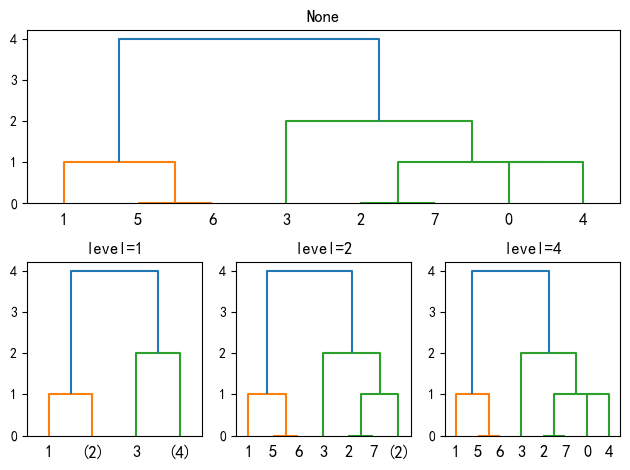

In [136]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(211, title='None')
dn = dendrogram(Z, ax=ax)

for i,L in enumerate([1,2,4], 4):
    ax = fig.add_subplot(2,3,i,title=f"level={L}")
    dn = dendrogram(Z, p=L, truncate_mode='level', ax=ax)

plt.tight_layout()
plt.show()

> 参考自  
> https://blog.csdn.net/m0_37816922/article/details/135651401  
> https://blog.csdn.net/m0_37816922/article/details/135653200  

## 基于凝聚式层次聚类的美国犯罪情况聚类

### 数据读取

In [123]:
df = pd.read_excel('data/USArrests.xlsx')
df

,Murder,Assault,UrbanPop,State
0,13,236,58,阿拉巴马州
1,10,263,48,阿拉斯加州
2,8,294,80,亚利桑那州
3,9,190,50,阿肯色州
4,9,276,91,加利福尼亚州
5,8,204,78,科罗拉多州
6,3,110,77,康涅狄格州
7,6,238,72,特拉华州
8,15,335,80,佛罗里达州
9,17,211,60,佐治亚州


### 数据预处理

假设三个人在不同平台看了两部电影并进行了评分，A平台采用5分制，B平台采用百分制；具体评分如下

In [124]:
zs = [5, 100]
ls = [4.8, 80]
ww = [1, 100]

data = [zs, ls, ww]

Text(1, 100, 'ww')

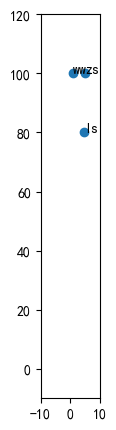

In [125]:
%matplotlib inline

import matplotlib.pyplot as plt

x = [i[0] for i in data]
y = [i[1] for i in data]

fig = plt.figure()
ax = fig.add_axes((0.1,0.1,0.8,0.8))

ax.set_aspect("equal")
ax.set_xlim(-10,10)
ax.set_ylim(-10,120)
ax.scatter(x=x, y=y)
ax.text(5, 100, "zs")
ax.text(4.8, 80, "ls")
ax.text(1,100, "ww")

##### 最大最小规范化示例

In [126]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))

print(scaler.data_max_)

print(scaler.transform(data))

print(scaler.transform([[2, 2]]))

MinMaxScaler()
[ 1. 18.]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[[1.5 0. ]]


#### 电影评分最大最小规范化

Text(0.0, 1.0, 'ww')

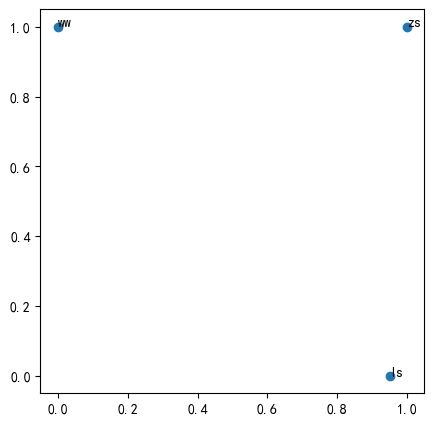

In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

zs = [5, 100]
ls = [4.8, 80]
ww = [1, 100]

data = [zs, ls, ww]

scale_data = scaler.fit_transform(data)


import matplotlib.pyplot as plt

x = scale_data[:,0]
y = scale_data[:,1]

fig = plt.figure()
ax = fig.add_axes((0.1,0.1,0.8,0.8))

ax.set_aspect("equal")

ax.scatter(x=x, y=y)
ax.text(scale_data[0][0], scale_data[0][1], "zs")
ax.text(scale_data[1][0], scale_data[1][1], "ls")
ax.text(scale_data[2][0], scale_data[2][1], "ww")

Text(0.2, 1.0, 'ww')

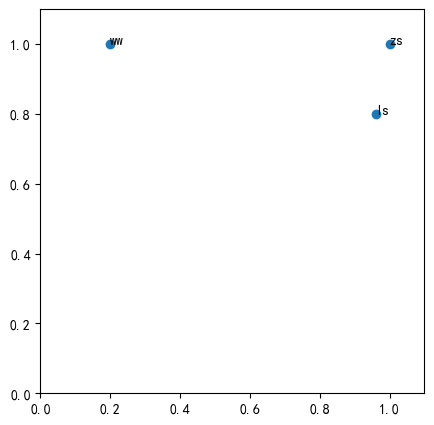

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

zs = [5, 100]
ls = [4.8, 80]
ww = [1, 100]
min = [0, 0]
max = [5, 100]

data = [zs, ls, ww, min, max]

scale_data = scaler.fit_transform(data)


import matplotlib.pyplot as plt

x = scale_data[:3][:,0]
y = scale_data[:3][:,1]

fig = plt.figure()
ax = fig.add_axes((0.1,0.1,0.8,0.8))

ax.set_aspect("equal")
ax.set_xlim(0,1.1)
ax.set_ylim(0,1.1)
ax.scatter(x=x, y=y)
ax.text(scale_data[0][0], scale_data[0][1], "zs")
ax.text(scale_data[1][0], scale_data[1][1], "ls")
ax.text(scale_data[2][0], scale_data[2][1], "ww")

### 美国犯罪情况数据

In [129]:
from sklearn.preprocessing import MinMaxScaler
data = df[["Murder","Assault","UrbanPop"]]
data

,Murder,Assault,UrbanPop
0,13,236,58
1,10,263,48
2,8,294,80
3,9,190,50
4,9,276,91
5,8,204,78
6,3,110,77
7,6,238,72
8,15,335,80
9,17,211,60


### 美国犯罪情况数据规范化

In [130]:
scale_data = MinMaxScaler().fit_transform(data)
scale_data.shape

(50, 3)

数据预览

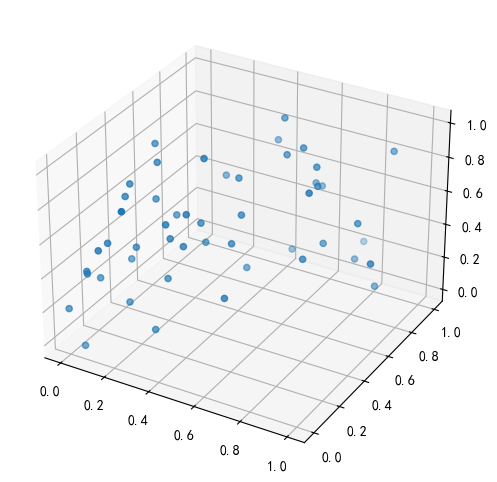

In [131]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure("tree",(8,6), 100)
ax = fig.add_subplot(111,projection="3d")
ax.scatter(scale_data[:,0], scale_data[:,1], scale_data[:,2])

### 凝聚式层次聚类

In [132]:
import scipy.cluster.hierarchy as shc

cluster_matrix =shc.linkage(scale_data, method='ward')
cluster_matrix.shape

(49, 4)

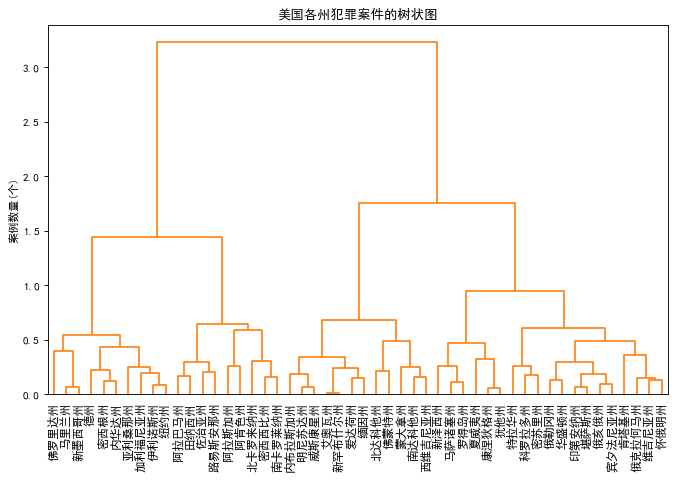

In [133]:
plt.figure(figsize=(10, 6), dpi= 80)
plt.title("美国各州犯罪案件的树状图", fontsize=12)

# 绘制树状图
dend = shc.dendrogram(cluster_matrix, labels=df.State.values, color_threshold=100)
plt.xticks(fontsize=10.5)
plt.ylabel('案例数量(个)')
plt.show()

> 参考自 《Python数据可视化》 黑马程序员 (作者) 人邮教育出版社